In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [5]:
data=load_iris()

In [12]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
##pre processing
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
x_scaled=scaler.fit_transform(df)

In [17]:
## Apply PCA
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=2)

In [19]:
pca_scaled=pca.fit_transform(x_scaled)

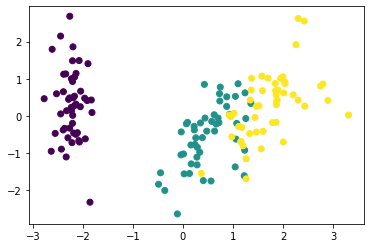

In [20]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=data.target)

#### Agglomerative Clustring
#### Dendogram to find the how many cluser

Text(0, 0.5, 'Euclidean distance')

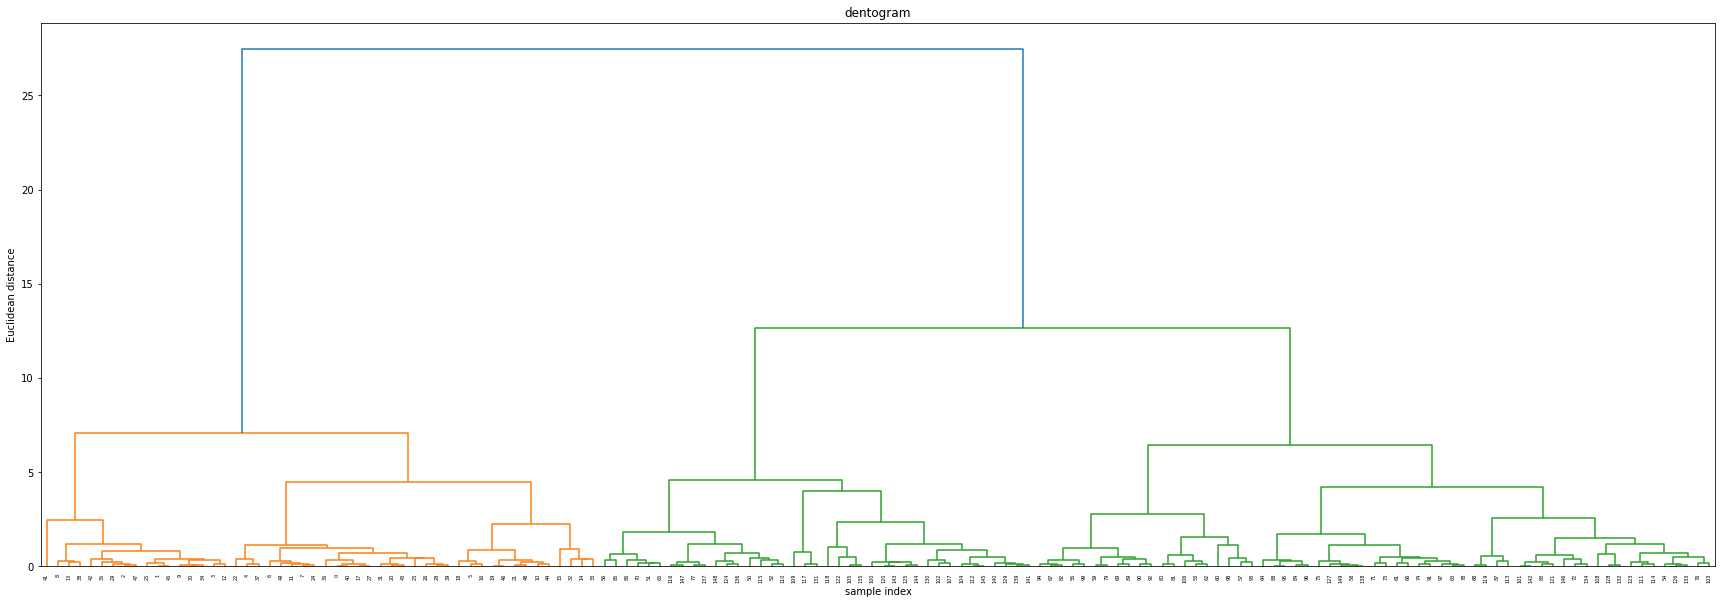

In [25]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(30,10))
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('dentogram')
plt.xlabel('sample index')
plt.ylabel('Euclidean distance')

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [29]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

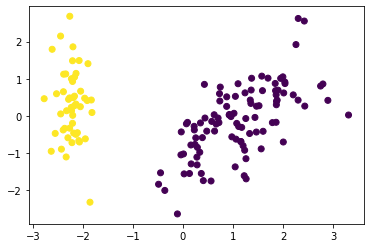

In [30]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
sillhout_coeff=[]

for k in range(2,11):
    cluster=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')
    cluster.fit(pca_scaled)
    score=silhouette_score(pca_scaled,cluster.labels_)
    sillhout_coeff.append(score)
    

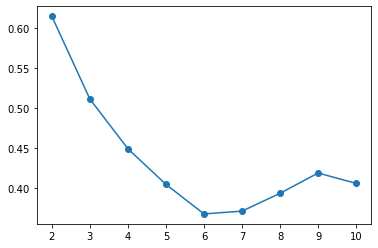

In [35]:
plt.plot(range(2,11),sillhout_coeff,marker='o')
plt.xticks(range(2,11))
plt.show()